In [2]:
import pandas as pd
from pathlib import Path
import torch
import json
import os
import time
import numpy as np
from torch_geometric.data import Data
import matplotlib.pyplot as plt

/homes/dlupo/.local/lib/python3.9/site-packages/torch/__config__.py:10: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._show_config()


In [3]:
# Load data path
PATH_FOLDER_COPY_NUMBER = "/work/h2020deciderficarra_shared/TCGA/OV/project_n16_data/CopyNumber"
PATH_CASE_ID_STRUCTURE = "/homes/dlupo/Progetto_BioInformatics/AI_for_Bioinformatics_Project/Preprocessing/Final/case_id_and_structure.json"
PATH_GENE_ID_PROTEIN_CODING = "/homes/dlupo/Progetto_BioInformatics/AI_for_Bioinformatics_Project/Preprocessing/Final/gene_id_protein_coding.json"

In [4]:
with open(PATH_CASE_ID_STRUCTURE, 'r') as file:
    file_parsed = json.load(file)

copy_number_folder_list = []
os_list = []
for key in file_parsed.keys():
    copy_number_folder_list.append(file_parsed[key]["files"]["copy_number"])
    os_list.append(file_parsed[key]['os'])

def remove_version(x):
    if '.' in x:
        return x.split('.')[0]
    return x

gene_id_list = []
with open(PATH_GENE_ID_PROTEIN_CODING) as json_file:
    gene_id_list = json.load(json_file)

# Convert gene_id_list into a set data structure to speed up the lookup
gene_id_set = set(gene_id_list)

list_df_CNV = []
for root, dirs, files in os.walk(PATH_FOLDER_COPY_NUMBER):
    for dir in dirs:
        for root, dirs, files in os.walk(PATH_FOLDER_COPY_NUMBER + "/" + dir):
            for file in files:
                if file in copy_number_folder_list:
                    parsed_file = pd.read_csv(PATH_FOLDER_COPY_NUMBER + "/" + dir + "/" + file, sep='\t')
                    parsed_file['gene_id'] = parsed_file['gene_id'].apply(remove_version)
                    parsed_file = parsed_file[parsed_file['gene_id'].isin(gene_id_set)]
                    list_df_CNV.append(parsed_file)


list_df_CNV_filled = []
for i in range(len(list_df_CNV)):
    list_df_CNV_filled.append(list_df_CNV[i].fillna(0))

In [5]:
# Creiamo un set per ogni dataframe e verifichiamo se sono tutti uguali
set_values = {frozenset(df['gene_id'].unique()) for df in list_df_CNV_filled}

if len(set_values) == 1:
    print("All dataframes have same values for gene_id column")
else:
    print("dataframes have different value for gene_id column")

All dataframes have same values for gene_id column


In [6]:
# Concatenare tutti i dataframe
df_concatenato = pd.concat(list_df_CNV_filled)

# Calcolare la varianza per ogni gene_id
varianze = df_concatenato.groupby('gene_id')['copy_number'].var()

# Soglia per selezionare le righe più variabili (esempio: selezioniamo sopra la mediana)
soglia = varianze.median()
# gene_significativi = varianze[varianze > soglia].index

In [7]:
df_var = pd.DataFrame({'variance':varianze.values})
df_var_sorted = pd.DataFrame(df_var.sort_values(by=['variance'],ascending=False).values, columns=['variance'])

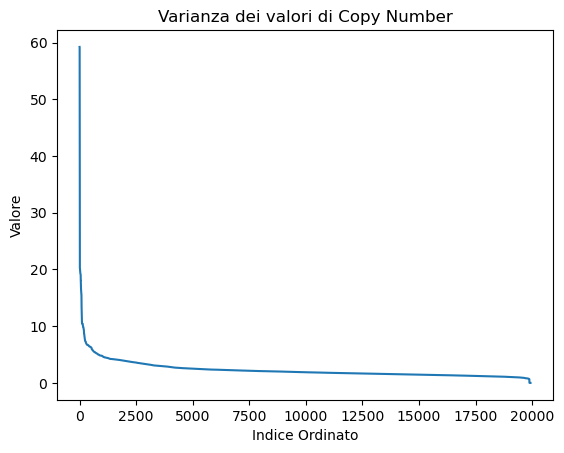

In [8]:
import seaborn as sns

# sns.scatterplot(x=df_var_sorted.index, y=df_var_sorted['variance'])
sns.lineplot(x=df_var_sorted.index, y=df_var_sorted['variance'])
plt.xlabel('Indice Ordinato')
plt.ylabel('Valore')
plt.title('Varianza dei valori di Copy Number')
plt.show()


In [ ]:
top_n = 1000  # numero di geni che si vuole mantenere
gene_significativi = varianze.nlargest(top_n).index
# gene_significativi = varianze[varianze > soglia].index

Index(['ENSG00000111726'], dtype='object', name='gene_id')


In [16]:
list_df_CNV_filtered = []
for i in range(len(list_df_CNV_filled)):
    list_df_CNV_filtered.append(list_df_CNV_filled[i][list_df_CNV_filled[0]['gene_id'].isin(gene_significativi)])

In [17]:
list_df_CNV_filtered[33].shape

(1000, 8)

In [12]:
[[v] for v in list(list_df_CNV_filtered[3]['copy_number'])]

[[3.0],
 [3.0],
 [3.0],
 [3.0],
 [3.0],
 [3.0],
 [3.0],
 [3.0],
 [3.0],
 [3.0],
 [3.0],
 [3.0],
 [3.0],
 [3.0],
 [3.0],
 [3.0],
 [3.0],
 [3.0],
 [3.0],
 [3.0],
 [3.0],
 [3.0],
 [3.0],
 [3.0],
 [3.0],
 [3.0],
 [3.0],
 [3.0],
 [3.0],
 [3.0],
 [3.0],
 [3.0],
 [3.0],
 [3.0],
 [3.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [4.0],
 [1.0],
 [1.0],
 [1.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [5.0],
 [3.0],


In [13]:
from sklearn.metrics import pairwise_distances
THRESHOLD = 0.06
list_of_Data = []
for case_index in range(0, 6):
    edges = []
    in_1 = [[v] for v in list(list_df_CNV_filtered[case_index]['copy_number'])]

    dist_a = pairwise_distances(in_1, metric="euclidean")

    d_mask = np.zeros(dist_a.shape, dtype=bool)
    np.fill_diagonal(d_mask, 1)

    # Force the diagonal to be equal to Threshold, so it will not be considered, so no self loops.
    dist_a[d_mask] = THRESHOLD

    row, cols = np.where(dist_a < THRESHOLD)
    edges.append(list(row))
    edges.append(list(cols))

    edge_index = torch.tensor(edges, dtype=torch.long)
    x = torch.tensor(list(list_df_CNV_filtered[case_index]['copy_number']), dtype=torch.float)
    y = torch.tensor(os_list[case_index])
    list_of_Data.append(Data(x=x, edge_index=edge_index, y=y))


In [101]:
list_of_Data[0].num_edges

811056

In [17]:
varianze.values

array([2.1259587 , 2.1259587 , 4.30938053, ..., 2.15347099, 2.71000983,
       1.3087119 ])